In [2]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt

3.(a)

In [99]:
def generate_students_pass_fail(n=200,pass_line=70,random_seed=42):
    def sigmoid(x):
        return 1./(1.+np.exp(-x))
    # Generates noisy data along curved line.
    # The curve is non-linear and the noise/variance is heteroskedastic and non-gaussian, so it breaks
    # pretty much all classical statistical model assumptions.  It's both pretty fun and kind of 
    # disturbing how easy it is to do that.
    np.random.seed(random_seed)
    x = 6*np.random.rand(n, 1)
    x = np.sort(x,axis=0)
    score = 100* sigmoid(-2+x+.4*np.random.randn(n,1))+5*np.random.randn(n,1)
    y = score>pass_line
    y = y.reshape(-1)
    return x,y


In [100]:
x,y=generate_students_pass_fail()
print(x.shape,y.shape)


(200, 1) (200,)


Data visualization:

In [101]:
n_train=150
n_valid=50

# Let's permute the data before we split it too!
permutation=np.random.permutation(200)
x_permute=x[permutation]
y_permute=y[permutation]
# One way to split is to just pull out data indices:
x_train=x_permute[:n_train]
x_valid=x_permute[n_train:n_train+n_valid]
y_train=y_permute[:n_train]
y_valid=y_permute[n_train:n_train+n_valid]

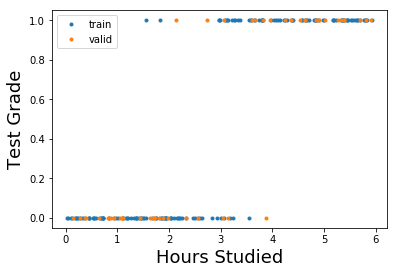

In [102]:
plt.plot(x_train,y_train,'.',label='train')
plt.plot(x_valid,y_valid,'.',label='valid')
plt.xlabel("Hours Studied", fontsize=18)
plt.ylabel("Test Grade", fontsize=18)
plt.legend()
plt.axis('tight')
plt.show()

Fit logistic regression model:

In [103]:
Lmodel=LogisticRegression(C=1,solver='lbfgs')


In [104]:
Lmodel.fit(x_train,y_train)
print(Lmodel.coef_,Lmodel.intercept_)

[[2.48233208]] [-7.2369353]


The validation error is 0.1


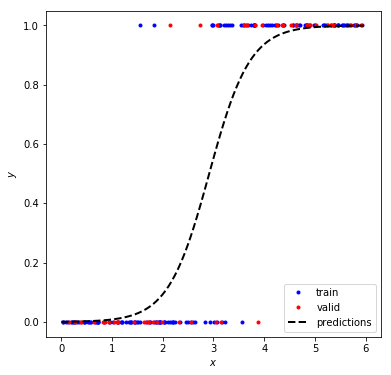

In [105]:
fig=plt.figure(figsize=[6,6])
plt.plot(x_train, y_train, "b.",label='train')
plt.plot(x_valid, y_valid, "r.",label='valid')
x_line=np.linspace(0,6,100)
y_hat=Lmodel.predict_proba(x_line.reshape(-1,1))[:,1]

log_acu=accuracy_score(y_valid,Lmodel.predict(x_valid), normalize=True, sample_weight=None)
log_valid_error=round((1-log_acu),2)
print(f'The validation error is {log_valid_error}')
plt.plot(x_line,y_hat,'k--',linewidth=2,label='predictions')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.axis('tight')
plt.show()

Fit KNN model:

In [106]:
for k in range(1,40):
    knn_model=KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    knn_valid_mse=mean_squared_error(y_valid,knn_model.predict(x_valid))
    print('For {} neighbors the MSE is {}'.format(k,round(knn_valid_mse,3)))

For 1 neighbors the MSE is 0.1
For 2 neighbors the MSE is 0.095
For 3 neighbors the MSE is 0.078
For 4 neighbors the MSE is 0.085
For 5 neighbors the MSE is 0.088
For 6 neighbors the MSE is 0.083
For 7 neighbors the MSE is 0.081
For 8 neighbors the MSE is 0.075
For 9 neighbors the MSE is 0.074
For 10 neighbors the MSE is 0.074
For 11 neighbors the MSE is 0.073
For 12 neighbors the MSE is 0.074
For 13 neighbors the MSE is 0.072
For 14 neighbors the MSE is 0.072
For 15 neighbors the MSE is 0.07
For 16 neighbors the MSE is 0.066
For 17 neighbors the MSE is 0.068
For 18 neighbors the MSE is 0.065
For 19 neighbors the MSE is 0.065
For 20 neighbors the MSE is 0.064
For 21 neighbors the MSE is 0.065
For 22 neighbors the MSE is 0.066
For 23 neighbors the MSE is 0.066
For 24 neighbors the MSE is 0.066
For 25 neighbors the MSE is 0.067
For 26 neighbors the MSE is 0.066
For 27 neighbors the MSE is 0.065
For 28 neighbors the MSE is 0.065
For 29 neighbors the MSE is 0.062
For 30 neighbors the MSE i

choose k=29 because it has the lowest MSE.

Calculate validation error.

In [125]:
knn_model=KNeighborsRegressor(n_neighbors=29)
knn_model.fit(x_train,y_train)
threshold = 0.5
knn_acu=1-accuracy_score(y_valid,(knn_model.predict(x_valid)>threshold).astype(int))
print(f'validation error for KNN regression is {round(knn_acu,2)}')

validation error for KNN regression is 0.1


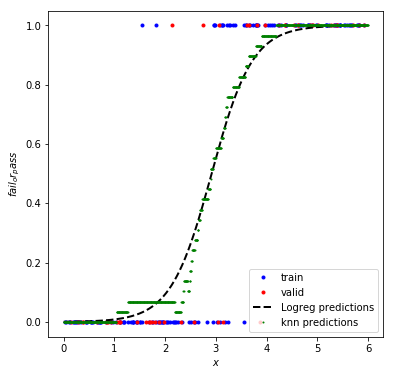

In [107]:
fig=plt.figure(figsize=[6,6])
# First, let's draw our data points
plt.plot(x_train, y_train, "b.",label='train')
plt.plot(x_valid, y_valid, "r.",label='valid')
# Now, leplt.plot(x_train, y_train, "b.",label='data')t's draw our linear fit
x_ends=np.linspace(0,6,1000)
y_hat=Lmodel.predict_proba(x_ends.reshape(-1,1))[:,1]

knn_model=KNeighborsRegressor(n_neighbors=29)
knn_model.fit(x_train,y_train)
y_hat2 = knn_model.predict(x_ends.reshape(-1,1))

plt.plot(x_ends,y_hat,'k--',linewidth=2,label='Logreg predictions')
plt.plot(x_ends,y_hat2,'k.',c='g',markersize=2,label='knn predictions')

plt.xlabel("$x$")
plt.ylabel("$fail_or_pass$")
plt.legend()
plt.axis('tight')
plt.show()

Prefer logistic regression. For KNN regression, the prediction results are prone to be affected by few training data which deviate significantly. While logistic regression results provide a smooth increase of probability, which avoids such noise.

Problem 3(b): 2-D circles 

In [1]:
np.random.seed(42)
from sklearn.datasets import make_circles
x,y=make_circles(n_samples=500,shuffle=False,noise=.10,random_state=42)

NameError: name 'np' is not defined

Data visualization:

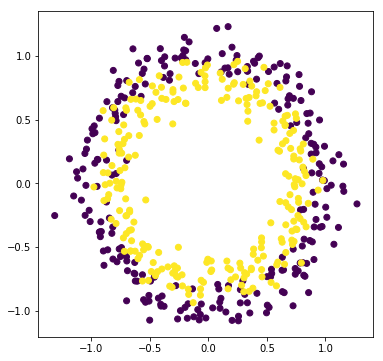

In [167]:
fig=plt.figure(figsize=[6,6])
plt.scatter(x[:,0],x[:,1],c=y[:])

In [168]:
cir_train=400
cir_valid=100

# Let's permute the data before we split it too!
permutation=np.random.permutation(500)
x_permute=x[permutation]
y_permute=y[permutation]
# One way to split is to just pull out data indices:
xC_train=x_permute[:cir_train]
xC_valid=x_permute[cir_train:cir_train+cir_valid]
yC_train=y_permute[:cir_train]
yC_valid=y_permute[cir_train:cir_train+cir_valid]


Fit logistic regression model:

In [132]:
Cir_model=LogisticRegression(C=1,solver='lbfgs')

In [133]:
Cir_model.fit(xC_train,yC_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

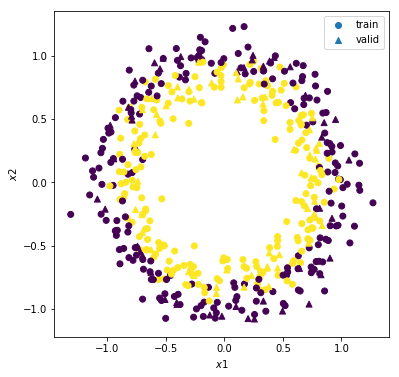

In [134]:
fig=plt.figure(figsize=[6,6])
# First, let's draw our data points
plt.scatter(xC_train[:,0], xC_train[:,1], c=yC_train[:],label='train')
plt.scatter(xC_valid[:,0], xC_valid[:,1],c=yC_valid[:],marker="^",label='valid')
# Now, leplt.plot(x_train, y_train, "b.",label='data')t's draw our linear fit
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.legend()
plt.axis('tight')
plt.show()

In [140]:
log_cir_acu=accuracy_score(yC_valid,Cir_model.predict(xC_valid), normalize=True, sample_weight=None)
log_cir_valid_error=1-log_cir_acu
print(f'validation error for Log regression is {round(log_cir_valid_error,2)}')


validation error for Log regression is 0.58


Fit KNN model:

In [136]:
for k in range(1,50):
    Cir_knn_model=KNeighborsRegressor(n_neighbors=k)
    Cir_knn_model.fit(xC_train,yC_train)
    knn_valid_mse=mean_squared_error(yC_valid,Cir_knn_model.predict(xC_valid))
    print(f'For {k} neighbors the MSE is {round(knn_valid_mse,4)}')

For 1 neighbors the MSE is 0.15
For 2 neighbors the MSE is 0.1175
For 3 neighbors the MSE is 0.1011
For 4 neighbors the MSE is 0.1013
For 5 neighbors the MSE is 0.1008
For 6 neighbors the MSE is 0.1056
For 7 neighbors the MSE is 0.1045
For 8 neighbors the MSE is 0.1042
For 9 neighbors the MSE is 0.1084
For 10 neighbors the MSE is 0.1094
For 11 neighbors the MSE is 0.1034
For 12 neighbors the MSE is 0.1051
For 13 neighbors the MSE is 0.1125
For 14 neighbors the MSE is 0.1181
For 15 neighbors the MSE is 0.1204
For 16 neighbors the MSE is 0.1234
For 17 neighbors the MSE is 0.127
For 18 neighbors the MSE is 0.133
For 19 neighbors the MSE is 0.1384
For 20 neighbors the MSE is 0.1399
For 21 neighbors the MSE is 0.1421
For 22 neighbors the MSE is 0.1443
For 23 neighbors the MSE is 0.1484
For 24 neighbors the MSE is 0.1506
For 25 neighbors the MSE is 0.1506
For 26 neighbors the MSE is 0.1542
For 27 neighbors the MSE is 0.1579
For 28 neighbors the MSE is 0.1622
For 29 neighbors the MSE is 0.167

Choose k=5 since it has a relatively low mse = 0.1008
iv. Prefer KNN model, it has much lower validation error.

calculate validation error.

In [138]:
Cir_knn_model=KNeighborsRegressor(n_neighbors=5)
Cir_knn_model.fit(xC_train,yC_train)
threshold = 0.5
knn_acu=1-accuracy_score(yC_valid,(Cir_knn_model.predict(xC_valid)>threshold).astype(int))
print(f'validation error for KNN regression is {round(knn_acu,2)}')

validation error for KNN regression is 0.12


3(b)iv: prefer KNN regression model, since it has much lower validation error.

3(c):

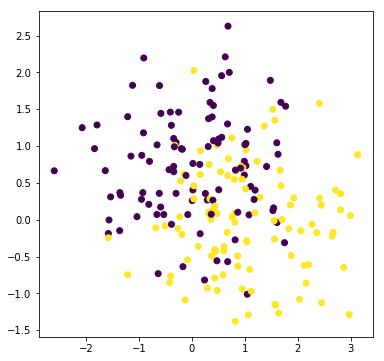

In [142]:
from sklearn.datasets import make_moons
np.random.seed(42)
x,y=make_moons(n_samples=200,noise=0.65,random_state=42)
fig=plt.figure(figsize=[6,6])
plt.scatter(x[:,0],x[:,1],c=y[:])

In [143]:
moon_train=150
moon_valid=50

# Let's permute the data before we split it too!
permutation=np.random.permutation(200)
x_permute=x[permutation]
y_permute=y[permutation]
# One way to split is to just pull out data indices:
xM_train=x_permute[:moon_train]
xM_valid=x_permute[moon_train:moon_train+moon_valid]
yM_train=y_permute[:moon_train]
yM_valid=y_permute[moon_train:moon_train+moon_valid]

Fit logistic regression:

In [144]:
moon_log_model=LogisticRegression(C=1,solver='lbfgs')

In [145]:
moon_log_model.fit(xM_train,yM_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

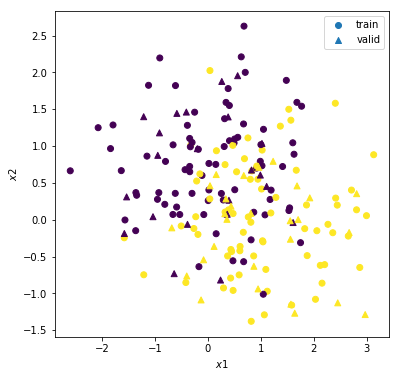

In [146]:
fig=plt.figure(figsize=[6,6])
plt.scatter(xM_train[:,0], xM_train[:,1], c=yM_train[:],label='train')
plt.scatter(xM_valid[:,0], xM_valid[:,1],c=yM_valid[:],marker="^",label='valid')
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.legend()
plt.axis('tight')
plt.show()

In [147]:
log_moon_acu=accuracy_score(yM_valid,moon_log_model.predict(xM_valid), normalize=True, sample_weight=None)
log_moon_valid_error=1-log_moon_acu
print(f'validation error for log regression is {round(log_moon_valid_error,2)}')

validation error for log regression is 0.24


Fit KNN model:

In [149]:
for k in range(1,50):
    moon_knn_model=KNeighborsRegressor(n_neighbors=k)
    moon_knn_model.fit(xM_train,yM_train)
    knn_valid_mse=mean_squared_error(yM_valid,moon_knn_model.predict(xM_valid))
    print(f'For {k} neighbors the MSE is {round(knn_valid_mse,4)}')

For 1 neighbors the MSE is 0.34
For 2 neighbors the MSE is 0.245
For 3 neighbors the MSE is 0.2067
For 4 neighbors the MSE is 0.19
For 5 neighbors the MSE is 0.1992
For 6 neighbors the MSE is 0.1817
For 7 neighbors the MSE is 0.1669
For 8 neighbors the MSE is 0.1553
For 9 neighbors the MSE is 0.1588
For 10 neighbors the MSE is 0.1614
For 11 neighbors the MSE is 0.1585
For 12 neighbors the MSE is 0.1564
For 13 neighbors the MSE is 0.1542
For 14 neighbors the MSE is 0.1551
For 15 neighbors the MSE is 0.1545
For 16 neighbors the MSE is 0.156
For 17 neighbors the MSE is 0.1496
For 18 neighbors the MSE is 0.143
For 19 neighbors the MSE is 0.1471
For 20 neighbors the MSE is 0.1464
For 21 neighbors the MSE is 0.1513
For 22 neighbors the MSE is 0.1507
For 23 neighbors the MSE is 0.1509
For 24 neighbors the MSE is 0.1542
For 25 neighbors the MSE is 0.1521
For 26 neighbors the MSE is 0.1533
For 27 neighbors the MSE is 0.1558
For 28 neighbors the MSE is 0.1586
For 29 neighbors the MSE is 0.1609
F

choose k=18 MSE=0.143


Calculate knn validation error:

In [150]:
moon_knn_model=KNeighborsRegressor(n_neighbors=18)
moon_knn_model.fit(xM_train,yM_train)
threshold = 0.5
moon_knn_acu=1-accuracy_score(yM_valid,(moon_knn_model.predict(xM_valid)>threshold).astype(int))
print(f'validation error for KNN regression is {round(moon_knn_acu,2)}')

validation error for KNN regression is 0.22


3(c)iv:
    Prefer KNN regression model, beacause it has lower validation error.

4.

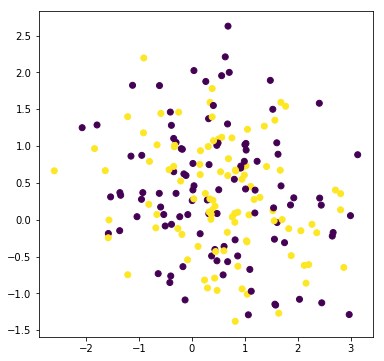

In [153]:
from sklearn.datasets import make_moons
np.random.seed(42)
x,y=make_moons(n_samples=200,noise=0.65,random_state=42)
y=np.random.rand(len(y))>=0.5
fig=plt.figure(figsize=[6,6])
plt.scatter(x[:,0],x[:,1],c=y[:])

In [154]:
moon_train=150
moon_valid=50

permutation=np.random.permutation(200)
x_permute=x[permutation]
y_permute=y[permutation]
xMr_train=x_permute[:moon_train]
xMr_valid=x_permute[moon_train:moon_train+moon_valid]
yMr_train=y_permute[:moon_train]
yMr_valid=y_permute[moon_train:moon_train+moon_valid]

In [158]:
for k in range(1,40):
    moonr_knn_model=KNeighborsRegressor(n_neighbors=k)
    moonr_knn_model.fit(xMr_train,yMr_train)
    knn_valid_mse=mean_squared_error(yMr_valid,moonr_knn_model.predict(xMr_valid)) 
    print('For {} neighbors the MSE is {}'.format(k,round(knn_valid_mse,2)))

For 1 neighbors the MSE is 0.42
For 2 neighbors the MSE is 0.36
For 3 neighbors the MSE is 0.34
For 4 neighbors the MSE is 0.32
For 5 neighbors the MSE is 0.31
For 6 neighbors the MSE is 0.33
For 7 neighbors the MSE is 0.29
For 8 neighbors the MSE is 0.29
For 9 neighbors the MSE is 0.3
For 10 neighbors the MSE is 0.29
For 11 neighbors the MSE is 0.3
For 12 neighbors the MSE is 0.29
For 13 neighbors the MSE is 0.29
For 14 neighbors the MSE is 0.29
For 15 neighbors the MSE is 0.29
For 16 neighbors the MSE is 0.29
For 17 neighbors the MSE is 0.28
For 18 neighbors the MSE is 0.28
For 19 neighbors the MSE is 0.28
For 20 neighbors the MSE is 0.28
For 21 neighbors the MSE is 0.28
For 22 neighbors the MSE is 0.28
For 23 neighbors the MSE is 0.28
For 24 neighbors the MSE is 0.27
For 25 neighbors the MSE is 0.27
For 26 neighbors the MSE is 0.27
For 27 neighbors the MSE is 0.27
For 28 neighbors the MSE is 0.27
For 29 neighbors the MSE is 0.27
For 30 neighbors the MSE is 0.27
For 31 neighbors the 

the best prediction is when k=31, MSE=0.26

Calculate validation error:

In [160]:
moonr_knn_model=KNeighborsRegressor(n_neighbors=31)
moonr_knn_model.fit(xMr_train,yMr_train)
threshold = 0.5
moonr_knn_acu=1-accuracy_score(yMr_valid,(moonr_knn_model.predict(xMr_valid)>threshold).astype(int))
print(f'validation error for KNN regression is {round(moonr_knn_acu,2)}')

validation error for KNN regression is 0.4



4(b):
    The prediction seems to have only 60% accuracy, more parameters (eg.algorithm, leaf size) in KNN model setup may be required to manually set indstead of leaving them as default. 
    

5:  
    15 hours, except for reading backgrounds and the book.